In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, mean_squared_error
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
img_width, img_height, img_num_channels = 28, 28, 1

(input_train, targets), (input_test, target_test) = mnist.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
inputs = input_train / 255
input_test = input_test / 255
inputs = np.expand_dims(inputs, -1)
input_test = np.expand_dims(input_test, -1)
targets = tf.keras.utils.to_categorical(targets, 10)
target_test = tf.keras.utils.to_categorical(target_test, 10)

In [3]:
def trainModel1(no_epochs, bs):
    batch_size = bs
    loss_function = categorical_crossentropy
    optimizer = Adam()
    no_classes = 10
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation=sigmoid, input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation=sigmoid))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(no_classes, activation=sigmoid))
    model.summary()
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])
    history = model.fit(inputs, targets, epochs=no_epochs,validation_split=0.1, shuffle= True, batch_size=batch_size)
    test_loss, test_acc = model.evaluate(input_test,  target_test, verbose=2)
    print(f'testSetLoss: {test_loss} - testSetAccuracyz: {test_acc}%')
    return history

In [4]:
def trainModel2(no_epochs, bs):
    batch_size = bs
    loss_function = mean_squared_error
    optimizer = Adam()
    no_classes = 10
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(no_classes, activation='softmax'))
    model.summary()
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])
    history = model.fit(inputs, targets, epochs=no_epochs,validation_split=0.1, shuffle= True, batch_size=batch_size)
    test_loss, test_acc = model.evaluate(input_test,  target_test, verbose=2)
    print(f'testSetLoss: {test_loss} - testSetAccuracyz: {test_acc}%')
    return history

In [5]:
def trainModel3(no_epochs, bs):
    batch_size = bs
    loss_function = categorical_crossentropy
    optimizer = SGD(learning_rate=0.1)
    no_classes = 10
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(no_classes, activation='softmax'))
    model.summary()
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])
    history = model.fit(inputs, targets, epochs=no_epochs,validation_split=0.1, shuffle= True, batch_size=batch_size)
    test_loss, test_acc = model.evaluate(input_test,  target_test, verbose=2)
    print(f'testSetLoss: {test_loss} - testSetAccuracyz: {test_acc}%')
    return history

In [6]:
def trainModel4(no_epochs, bs):
    batch_size = bs
    loss_function = categorical_crossentropy
    optimizer = SGD(learning_rate=0.01)
    no_classes = 10
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(no_classes, activation='softmax'))
    model.summary()
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])
    history = model.fit(inputs, targets, epochs=no_epochs,validation_split=0.1, shuffle= True, batch_size=batch_size)
    test_loss, test_acc = model.evaluate(input_test,  target_test, verbose=2)
    print(f'testSetLoss: {test_loss} - testSetAccuracyz: {test_acc}%')
    return history

In [8]:
test1_2 = trainModel1(100, 2)
hist_df = pd.DataFrame(test1_2.history)
hist_json_file = 'test1_2.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [9]:
test1_8 = trainModel1(100, 8)
hist_df = pd.DataFrame(test1_8.history)
hist_json_file = 'test1_8.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [10]:
test1_16 = trainModel1(100, 16)
hist_df = pd.DataFrame(test1_16.history)
hist_json_file = 'test1_16.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [11]:
test1_32 = trainModel1(100, 32)
hist_df = pd.DataFrame(test1_32.history)
hist_json_file = 'test1_32.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [12]:
test1_64 = trainModel1(100, 64)
hist_df = pd.DataFrame(test1_64.history)
hist_json_file = 'test1_64.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [13]:
test1_128 = trainModel1(100, 128)
hist_df = pd.DataFrame(test1_128.history)
hist_json_file = 'test1_128.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [14]:
test1_256 = trainModel1(100, 256)
hist_df = pd.DataFrame(test1_256.history)
hist_json_file = 'test1_256.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [15]:
test1_512 = trainModel1(100, 512)
hist_df = pd.DataFrame(test1_512.history)
hist_json_file = 'test1_512.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [16]:
test2_2 = trainModel2(100, 2)
hist_df = pd.DataFrame(test2_2.history)
hist_json_file = 'test2_2.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [17]:
test2_8 = trainModel2(100, 8)
hist_df = pd.DataFrame(test2_8.history)
hist_json_file = 'test2_8.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [18]:
test2_16 = trainModel2(100, 16)
hist_df = pd.DataFrame(test2_16.history)
hist_json_file = 'test2_16.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [19]:
test2_32 = trainModel2(100, 32)
hist_df = pd.DataFrame(test2_32.history)
hist_json_file = 'test2_32.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [20]:
test2_64 = trainModel2(100, 64)
hist_df = pd.DataFrame(test2_64.history)
hist_json_file = 'test2_64.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [21]:
test2_128 = trainModel2(100, 128)
hist_df = pd.DataFrame(test2_128.history)
hist_json_file = 'test2_128.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [22]:
test2_256 = trainModel2(100, 256)
hist_df = pd.DataFrame(test2_256.history)
hist_json_file = 'test2_256.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [23]:
test2_512 = trainModel2(100, 512)
hist_df = pd.DataFrame(test2_512.history)
hist_json_file = 'test2_512.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [24]:
test3_2 = trainModel3(100, 2)
hist_df = pd.DataFrame(test3_2.history)
hist_json_file = 'test3_2.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

KeyboardInterrupt: 

In [ ]:
test3_8 = trainModel3(100, 8)
hist_df = pd.DataFrame(test3_8.history)
hist_json_file = 'test3_8.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_17 (Averag (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 216)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6750/6750 [==============================] - 32s 5ms/step - loss: 0.0285 - accuracy: 0.8109 - val_loss: 0.0139 - val_accuracy: 0.9127
Epoch 2/100
6750/6750 [==============================] - 32s 5ms/step - loss: 0.0145 - accuracy: 0.9065

In [ ]:
test3_16 = trainModel3(100, 16)
hist_df = pd.DataFrame(test3_16.history)
hist_json_file = 'test3_16.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 216)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3375/3375 [==============================] - 13s 4ms/step - loss: 0.0348 - accuracy: 0.7681 - val_loss: 0.0135 - val_accuracy: 0.9240
Epoch 2/100
3375/3375 [==============================] - 13s 4ms/step - loss: 0.0148 - accuracy: 0.9080

In [ ]:
test3_32 = trainModel3(100, 32)
hist_df = pd.DataFrame(test3_32.history)
hist_json_file = 'test3_32.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_19 (Averag (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 216)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0453 - accuracy: 0.7003 - val_loss: 0.0174 - val_accuracy: 0.9073
Epoch 2/100
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0180 - accuracy: 0.8925 -

In [ ]:
test3_64 = trainModel3(100, 64)
hist_df = pd.DataFrame(test3_64.history)
hist_json_file = 'test3_64.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_20 (Averag (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 216)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
844/844 [==============================] - 5s 5ms/step - loss: 0.0536 - accuracy: 0.6379 - val_loss: 0.0222 - val_accuracy: 0.8910
Epoch 2/100
844/844 [==============================] - 4s 5ms/step - loss: 0.0216 - accuracy: 0.8722 - val

In [ ]:
test3_128 = trainModel3(100, 128)
hist_df = pd.DataFrame(test3_128.history)
hist_json_file = 'test3_128.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_21 (Averag (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 216)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
422/422 [==============================] - 3s 5ms/step - loss: 0.0729 - accuracy: 0.4516 - val_loss: 0.0382 - val_accuracy: 0.8175
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 0.0296 - accuracy: 0.8417 - val

In [ ]:
test3_256 = trainModel3(100, 256)
hist_df = pd.DataFrame(test3_256.history)
hist_json_file = 'test3_256.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 216)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
211/211 [==============================] - 2s 7ms/step - loss: 0.0835 - accuracy: 0.3278 - val_loss: 0.0655 - val_accuracy: 0.6035
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0478 - accuracy: 0.7408 - val

In [ ]:
test3_512 = trainModel3(100, 512)
hist_df = pd.DataFrame(test3_512.history)
hist_json_file = 'test3_512.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_23 (Averag (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 216)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
106/106 [==============================] - 1s 11ms/step - loss: 0.0890 - accuracy: 0.1933 - val_loss: 0.0859 - val_accuracy: 0.3123
Epoch 2/100
106/106 [==============================] - 1s 8ms/step - loss: 0.0765 - accuracy: 0.4851 - va

In [25]:
test5_2 = trainModel4(100, 2)
hist_df = pd.DataFrame(test5_2.history)
hist_json_file = 'test5_2.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [26]:
test5_8 = trainModel4(100, 8)
hist_df = pd.DataFrame(test5_8.history)
hist_json_file = 'test5_8.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [28]:
test5_16 = trainModel4(100, 16)
hist_df = pd.DataFrame(test5_16.history)
hist_json_file = 'test5_16.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [29]:
test5_32 = trainModel4(100, 32)
hist_df = pd.DataFrame(test5_32.history)
hist_json_file = 'test5_32.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [30]:
test5_64 = trainModel4(100, 64)
hist_df = pd.DataFrame(test5_64.history)
hist_json_file = 'test5_64.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [31]:
test5_128 = trainModel4(100, 128)
hist_df = pd.DataFrame(test5_128.history)
hist_json_file = 'test5_128.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [32]:
test5_256 = trainModel4(100, 256)
hist_df = pd.DataFrame(test5_256.history)
hist_json_file = 'test5_256.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [33]:
test5_512 = trainModel4(100, 512)
hist_df = pd.DataFrame(test5_512.history)
hist_json_file = 'test5_512.csv' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_csv(f)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_excel('example5.xlsx', index_col=0)
df['test1Ttime'] = df['test1Ttime'].apply(lambda x: x*86400)
df['test2Ttime'] = df['test2Ttime'].apply(lambda x: x*86400)
df['test3Ttime'] = df['test3Ttime'].apply(lambda x: x*86400)
df

,test1,test1Ttime,test2,test2Ttime,test3,test3Ttime,test4,test4Ttime
2,0.9860,14179.0,0.9850,13664.3,0.9909,13181.8,NaN,NaN
8,0.9875,3833.2,0.9875,3186.7,0.9903,2953.7,NaN,NaN
16,0.9887,2265.8,0.9902,1702.8,0.9892,1676.2,NaN,NaN
32,0.9875,1350.1,0.9913,1113.0,0.9889,1082.8,NaN,NaN
64,0.9897,681.5,0.9923,636.5,0.9879,607.1,NaN,NaN
128,0.9894,479.6,0.9909,403.0,0.9894,402.8,NaN,NaN
256,0.9895,345.4,0.9903,302.2,0.9852,299.9,NaN,NaN
512,0.9889,277.5,0.9909,259.3,0.9802,258.6,NaN,NaN


In [6]:
df['test1'] = df['test1'].apply(lambda x: x*100)
df['test2'] = df['test2'].apply(lambda x: x*100)
df['test3'] = df['test3'].apply(lambda x: x*100)
# df['activation'] = df['activation'].apply(lambda x: x*100)

([<matplotlib.axis.XTick at 0x1c9959c7160>,
 [Text(0, 0, '2'),
  Text(1, 0, '8'),
  Text(2, 0, '16'),
  Text(3, 0, '32'),
  Text(4, 0, '64'),
  Text(5, 0, '128'),
  Text(6, 0, '256'),
  Text(7, 0, '512')])

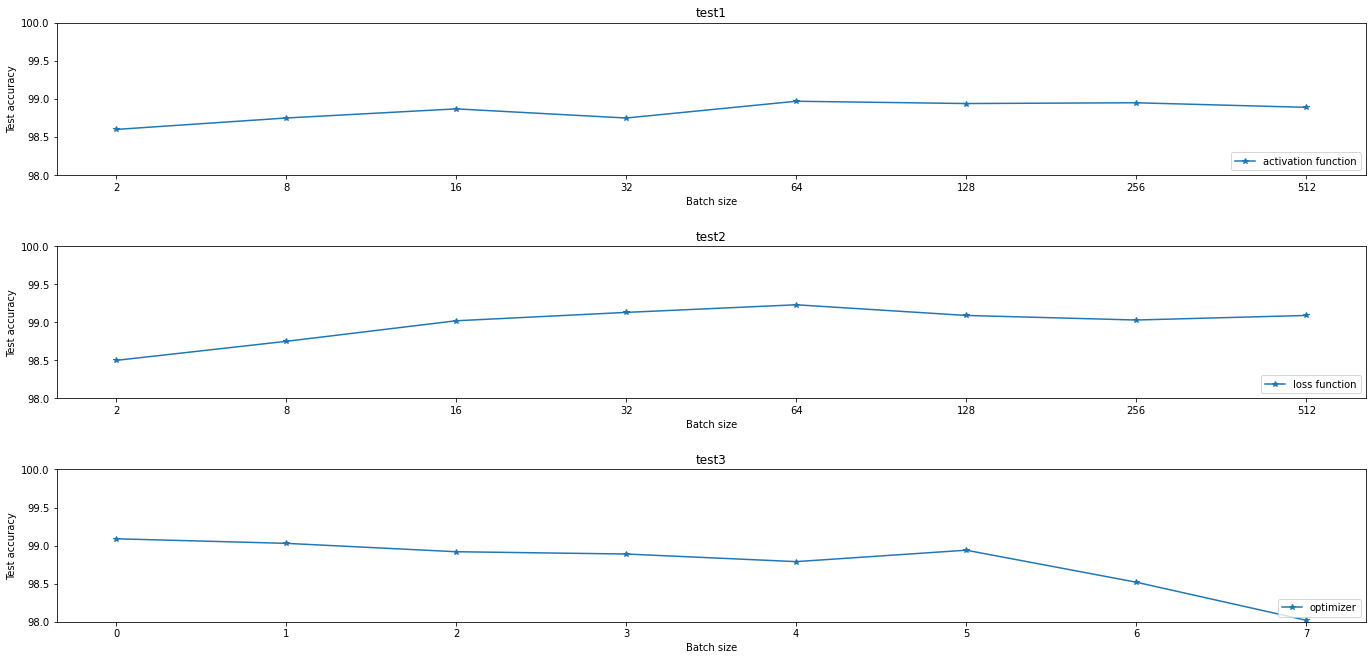

In [7]:
arr1 = np.array(df['test1'])
arr2 = np.array(df['test2'])
arr5 = np.array(df['test3'])
# arr7 = np.array(df['activation'])
sized = np.arange(0, 8)
bs = [2,8,16,32,64,128,256,512]
fig, ((ax1, ax3, ax5)) = plt.subplots(3, 1, figsize=(20,10))
fig.tight_layout(pad=5.0)

ax1.plot(sized, arr1, label='activation function', marker = '*')
ax1.set_xlabel('Batch size')
ax1.set_ylabel('Test accuracy')
ax1.legend(loc='lower right')
ax1.set_title('test1')
ax1.set_ylim([98, 100])
# ax1.xticks(sized, bs)
plt.sca(ax1)
plt.xticks(sized, bs)

ax3.plot(sized, arr2, label='loss function', marker = '*')
ax3.set_xlabel('Batch size')
ax3.set_ylabel('Test accuracy')
ax3.legend(loc='lower right')
ax3.set_title('test2')
ax3.set_ylim([98, 100])
# ax2.xticks(sized, bs)
plt.sca(ax3)
plt.xticks(sized, bs)


ax5.plot(sized, arr5, label='optimizer', marker = '*')
ax5.set_xlabel('Batch size')
ax5.set_ylabel('Test accuracy')
ax5.legend(loc='lower right')
ax5.set_title('test3')
ax5.set_ylim([98, 100])
# ax3.xticks(sized, bs)
plt.sca(ax3)
plt.xticks(sized, bs)

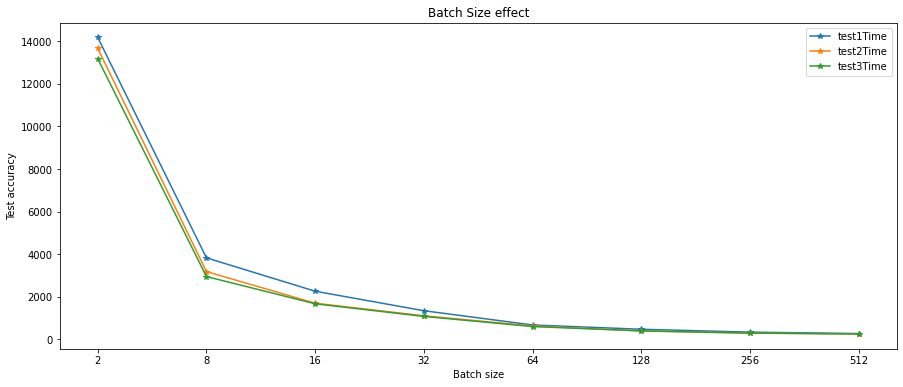

In [13]:
arr1 = np.array(df['test1Ttime'])
arr2 = np.array(df['test2Ttime'])
arr3 = np.array(df['test3Ttime'])

plt.figure(figsize=(15,6))
plt.plot(sized, arr1, label='test1Time', marker = '*')
plt.plot(sized, arr2, label='test2Time', marker = '*')
plt.plot(sized, arr3, label='test3Time', marker = '*')
plt.xlabel('Batch size')
plt.ylabel('Test accuracy')
plt.legend(loc='upper right')
plt.title('Batch Size effect')
plt.xticks(sized, bs)
plt.show()